In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data1_1.csv')
data.head()

,行政区划,户口类别,城镇家庭收入情况,城镇家庭住房情况,农村家庭收入情况,农村家庭住房情况,是否识字,是否就业,是否参加城乡居民养老保险,是否参加医疗保险,filter_$
0,1,1,0,0,3,1,1,2,1,1,1
1,1,1,0,0,3,1,2,2,1,1,1
2,1,1,0,0,3,1,1,2,1,1,1
3,1,1,0,0,3,1,1,2,2,1,1
4,1,1,0,0,3,4,2,2,1,1,1


In [3]:
del data['filter_$']

行政区划： 1：南京   2：无锡  3：徐州  4：常州  5：苏州  6：南通  7：连云港  8：淮安  9：盐城  10：扬州  11：镇江  12：泰州  13：宿迁

户口类别：1：农业  2：非农业

城镇家庭收入情况：1：低于低保标准  2：低于低收入标准或低保边缘标准  3：其他

城镇家庭住房情况：1：自由产权住房  2：享受住房保障政策  3：无房

农村家庭收入情况：1：年人均纯收入低于国家贫困标准（2300元/年）  2：年人均纯收入低于省级贫困标准  3：其他

农村家庭住房情况：1：自由住房，状况良好  2：自由住房，已鉴定属危房  3：自有住房，属危房未鉴定  4：无房

是否识字：1：识字  2：不识字

是否就业：1：就业  2：未就业

是否参加城乡居民养老保险：1：没参加  2：参加

是否参加医疗保险：1：没参加  2：参加


In [4]:
def comb(df):
    if df['城镇家庭收入情况'] == 0:
        x = df['农村家庭收入情况']
    else:
        x = df['城镇家庭收入情况']
    return x

In [5]:
data['收入'] = data[['城镇家庭收入情况','农村家庭收入情况']].apply(comb, axis=1)

In [6]:
def trans1(x):
    # 就业，识字
    if x == 1:
        x = 1
    else:
        x = 0
    return x
df1 = pd.DataFrame()
def trans2(x):
    # 养老保险，医疗保险
    if x == 1:
        x = 0
    else:
        x = 1
    return x

def trans3(x):
    # 家庭收入，
    if x == 3:
        x = 1
    else:
        x = 0
    return x

def trans4(x):
    # 城镇家庭住房
    if x == 3:
        x = 0
    else:
        if x == 0:
            x = 99
        else:
            x = 1
    return x

def trans5(x):
    # 农村家庭住房
    if x == 1:
        x = 1
    if x == 0:
        x = 99
    else:
        x = 0
    return x

In [7]:
df1 = pd.DataFrame()

In [8]:
df1['就业维度'] = data['是否就业'].map(lambda x:trans1(x))
df1['识字'] = data['是否识字'].map(lambda x:trans1(x))
df1['养老保险'] = data['是否参加城乡居民养老保险'].map(lambda x:trans2(x))
df1['医疗保险'] = data['是否参加医疗保险'].map(lambda x:trans2(x))
df1['收入'] = data['收入'].map(lambda x:trans3(x))
df1['城镇住房'] = data['城镇家庭住房情况'].map(lambda x:trans4(x))
df1['农村住房'] = data['农村家庭住房情况'].map(lambda x:trans5(x))

In [9]:
def comb2(df):
    if df['城镇住房'] == 99:
        x = df['农村住房']
    else:
        x = df['城镇住房']
    return x

In [10]:
df1['住房'] = df1[['城镇住房','农村住房']].apply(comb2,axis=1)

In [11]:
del df1['城镇住房']
del df1['农村住房']

In [12]:
df1.head()

,就业维度,识字,养老保险,医疗保险,收入,住房
0,0,1,0,0,1,0
1,0,0,0,0,1,0
2,0,1,0,0,1,0
3,0,1,1,0,1,0
4,0,0,0,0,1,0


0代表贫困，1代表不贫困.

临界线为3，若有3个及以上维度贫困则判断该个体贫困，反之则视为不贫困。

In [13]:
df1['count'] = df1.apply(sum, axis=1)

count等0,1,2,3为贫困

In [14]:
df1['region'] = data['行政区划']
df1['户口'] = data['户口类别']
df1.head()

,就业维度,识字,养老保险,医疗保险,收入,住房,count,region,户口
0,0,1,0,0,1,0,2,1,1
1,0,0,0,0,1,0,1,1,1
2,0,1,0,0,1,0,2,1,1
3,0,1,1,0,1,0,3,1,1
4,0,0,0,0,1,0,1,1,1


In [28]:
df1['count'].value_counts()

2    196836
3    187667
1    122359
5    120421
4    102938
6     44275
0     40117
Name: count, dtype: int64

In [25]:
len(df1)

814613

In [26]:
k = [0,1,2,3,4,5,6]
for i in range(7):
    print(df1['count'].value_counts()[k[:i+1]]

40117
162476
359312
546979
649917
770338
814613


In [38]:
p = []
total = []
for i in range(1,14):
    df = df1[df1['region'] == i]
    x = len(df[df['count'].isin([0,1,2,3])])
    y = len(df)
    p.append(x)
    total.append(y)
print(p)
print(total)

[34717, 18385, 80659, 21095, 26856, 62671, 47100, 53936, 63240, 27953, 16171, 32644, 61552]
[69570, 51745, 97647, 44001, 69311, 87634, 55004, 63573, 77620, 47720, 31588, 52661, 66539]


In [39]:
for i in range(13):
    print(p[i]/total[i])

0.49902256719850513
0.35530002898830804
0.8260264012207236
0.479420922251767
0.38747096420481597
0.7151448068101421
0.8563013599010981
0.8484104887294921
0.8147384694666323
0.5857711651299246
0.5119349119918957
0.6198894817796852
0.9250514735718902


In [40]:
def func(x):
    if x >= 4:
        x = 0
    else:
        x = 1
    return x

df1['label'] = df1['count'].map(lambda x:func(x))
df1.head()

,就业维度,识字,养老保险,医疗保险,收入,住房,count,region,户口,label
0,0,1,0,0,1,0,2,1,1,1
1,0,0,0,0,1,0,1,1,1,1
2,0,1,0,0,1,0,2,1,1,1
3,0,1,1,0,1,0,3,1,1,1
4,0,0,0,0,1,0,1,1,1,1


In [43]:
for i in range(1,14):
    df = df1[df1['region'] == i]
    x = len(df)
    y = ((6-df['count'])*df['label']).sum()
    print(y)

134063
70097
335553
74873
98508
244740
205265
228337
256781
102572
55682
122929
273442


x为各市残疾人口总数

y为各市贫困残疾人口贫困维度总和

In [17]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


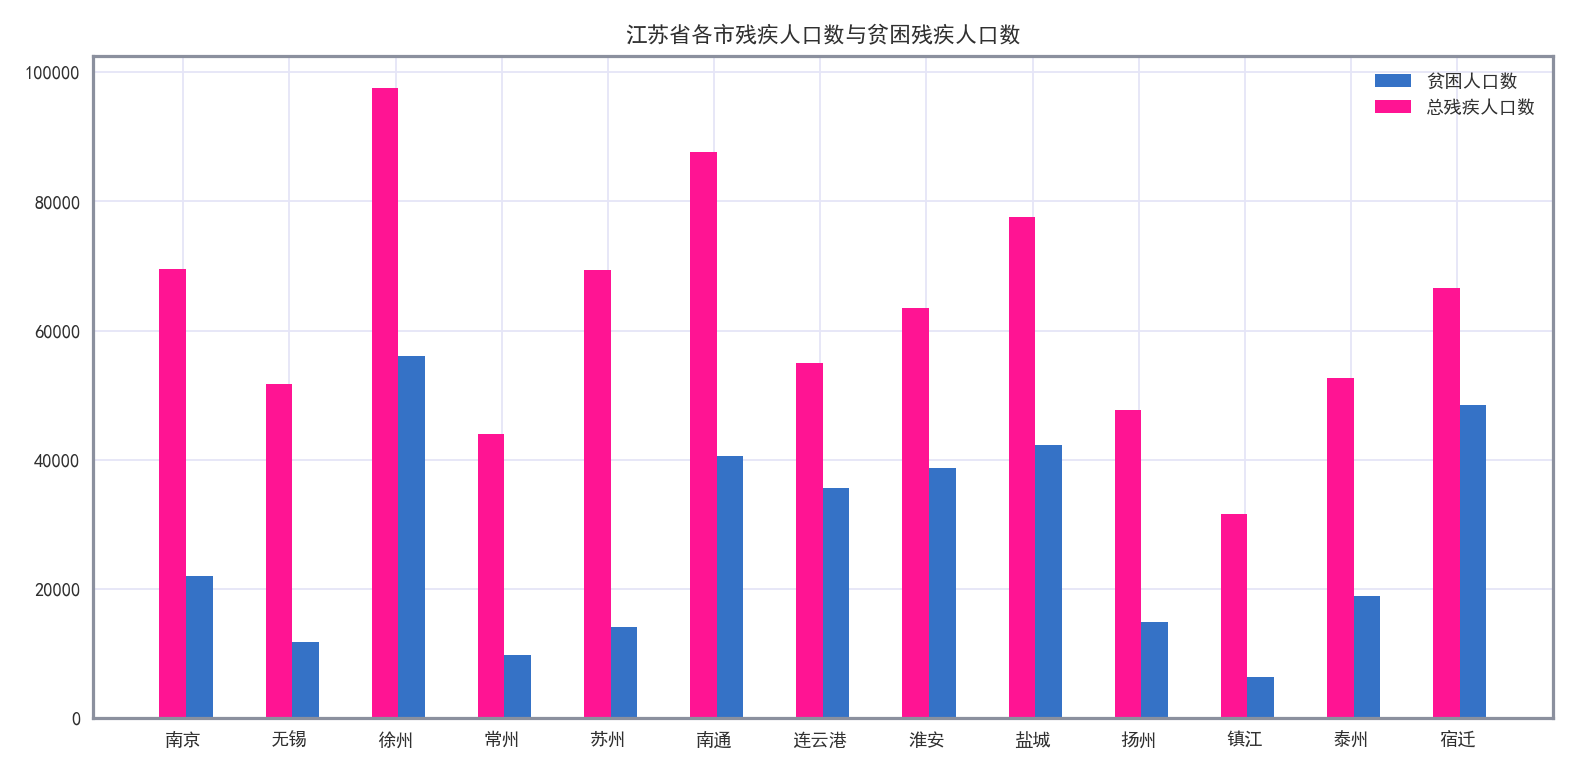

In [18]:
plt.style.use('seaborn-paper')
plt.rcParams['font.sans-serif'] = ['SimHei']
fig = plt.figure()
index = np.arange(1,14)
plt.bar(index+0.25, p, 0.25, color='b')
plt.bar(index, total, 0.25, color='#FF1493')
plt.xticks(index+0.1, ['南京','无锡','徐州','常州','苏州','南通','连云港','淮安','盐城','扬州','镇江','泰州','宿迁'])
#  1：南京 2：无锡 3：徐州 4：常州 5：苏州 6：南通 7：连云港 8：淮安 9：盐城 10：扬州 11：镇江 12：泰州 13：宿迁
plt.legend(['贫困人口数','总残疾人口数'])
plt.title('江苏省各市残疾人口数与贫困残疾人口数')

In [19]:
from pyecharts import Bar
from pyecharts import online
online()
attr = ['南京','无锡','徐州','常州','苏州','南通','连云港','淮安','盐城','扬州','镇江','泰州','宿迁']
bar = Bar('江苏省各市贫困残疾人口数')
bar.add('总残疾人口数',attr,total,mark_line=['average'],mark_point=['max','min'])
bar.add('贫困人口数',attr,p,mark_line=['average'],mark_point=['max','min'])
bar

In [44]:
df1.head()

,就业维度,识字,养老保险,医疗保险,收入,住房,count,region,户口,label
0,0,1,0,0,1,0,2,1,1,1
1,0,0,0,0,1,0,1,1,1,1
2,0,1,0,0,1,0,2,1,1,1
3,0,1,1,0,1,0,3,1,1,1
4,0,0,0,0,1,0,1,1,1,1


In [45]:
p1 = []
t1 = []
for i in range(1,3):
    df = df1[df1['户口'] == i]
    x = len(df[df['count'].isin([0,1,2,3])])
    y = len(df)
    p1.append(x)
    t1.append(y)
print(p1)
print(t1)

[474407, 72572]
[602387, 212226]


In [46]:
for i in range(2):
    print(p1[i]/t1[i])

0.7875452159492153
0.34195621648619867


In [47]:
for i in range(1,3):
    df = df1[df1['户口'] == i]
    y = ((6-df['count'])*df['label']).sum()
    print(y)

1940770
262072
